In [2]:
from google.colab import files
uploaded = files.upload()

Saving flight.csv to flight.csv


# EDA

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [45]:
# Mengecek tipe data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE seharusnya memiliki tipe data datetime

In [46]:
# Mengecek data yang hilang

missing_percentages = round(df.isnull().mean() * 100, 2).sort_values(ascending=False)
print("Persentase data hilang per kolom:")
print(missing_percentages[missing_percentages > 0])

Persentase data hilang per kolom:
WORK_PROVINCE    5.16
WORK_CITY        3.60
SUM_YR_1         0.87
AGE              0.67
SUM_YR_2         0.22
WORK_COUNTRY     0.04
dtype: float64


Terdapat 5 kolom yang memiliki missing value : WORK_PROVINCE, WORK_CITY, SUM_YR_1, AGE, SUM_YR_2, WORK_COUNTRY dan dibawah 6 persen.

In [47]:
# Mengecek data yang duplikat

df.duplicated().any()

np.False_

In [48]:
# Membagi kolom sesuai jenis

numericals = ['MEMBER_NO', 'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight']
categorical = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [49]:
# Melihat deskriptif data numerikal

df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


*  Mayoritas feature memiliki nilai mean > median yang menandakan nilai kolom cenderung berdistribusi positively skewed.
*  MEMBER_NO, FFP_TIER dan avg_discount memiliki nilai mean yang hampir sama dengan median yang menandakan kolom tersebut mendekati distribusi normal.
*  Nilai maksimal pada feature AGE adalah 110, usia ini terlalu tua.
*  Terdapat nilai 0 yaitu BP_SUM, SUM_YR_1, SUM_YR_2, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight.

In [50]:
# Melihat deskriptif data kategorikal

df[categorical].describe().T

,count,unique,top,freq
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


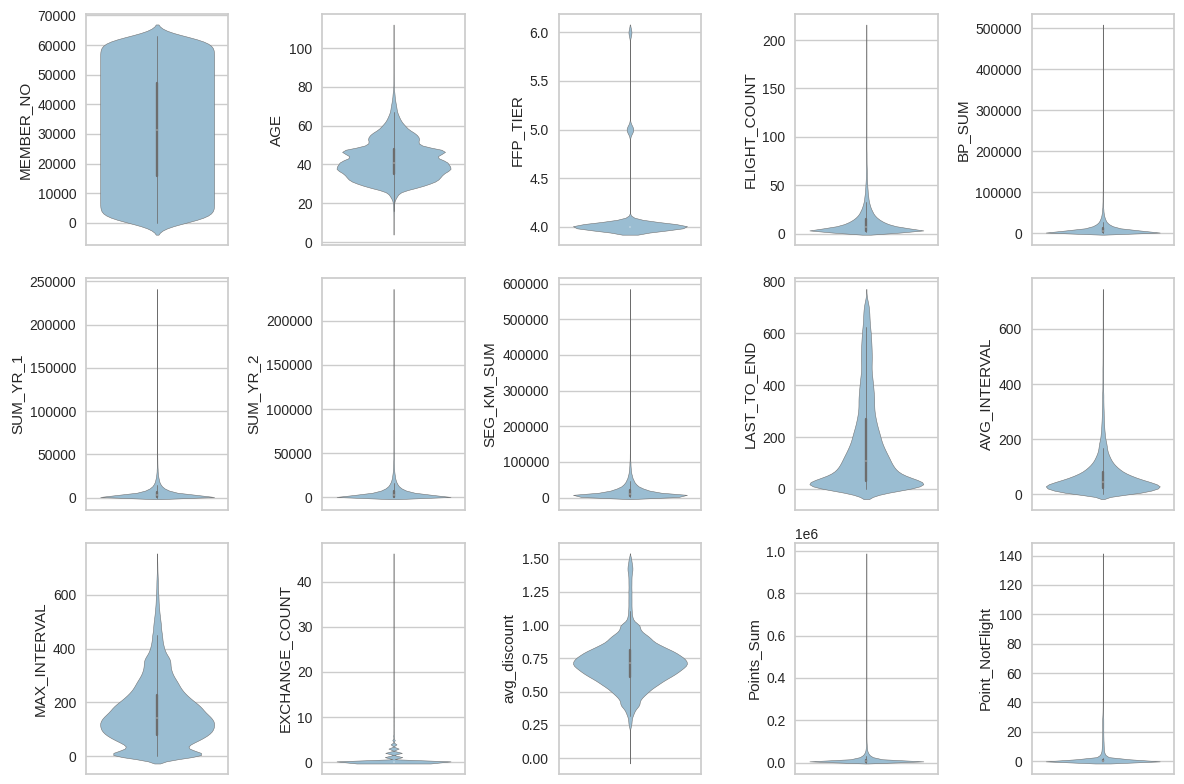

In [51]:
# Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i in range(0, len(numericals)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[numericals[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

<Axes: >

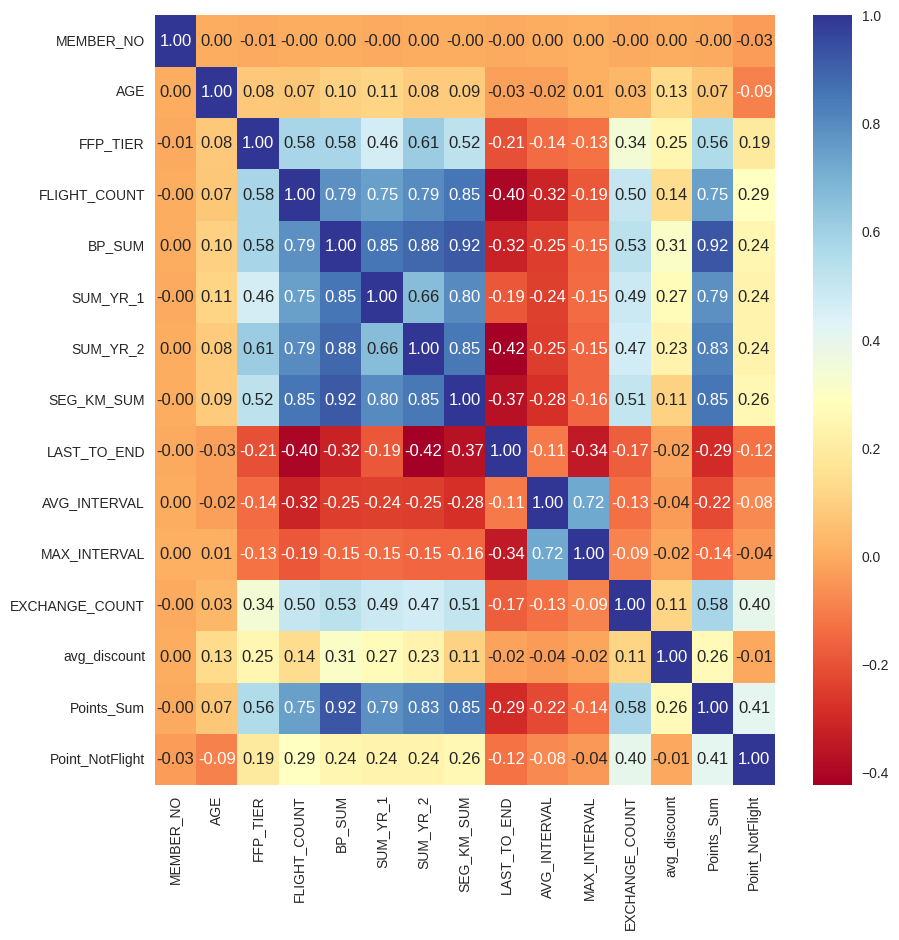

In [52]:
# Multivariate Analysis

plt.figure(figsize=(10, 10))
sns.heatmap(df[numericals].corr(), cmap='RdYlBu', annot=True, fmt='.2f')

Terdapat beberapa fitur yang memiliki korelasi tinggi :

Kelompok pertama yaitu FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, Points_Sum.

Kelompok kedua yaitu AVG_INTERVAL dengan MAX_INTERVAL.

# Data Preparation

In [53]:
# Mengubah jenis data menjadi tipe tanggal

date_cols = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

In [55]:
# Menghilangkan kolom yang tidak diperlukan untuk pemodelan

df_pre = df.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

In [56]:
# Mengecek kembali data yang hilang pada kolom yang digunakan

missing_percentages = round(df_pre.isnull().mean() * 100, 2).sort_values(ascending=False)
print("Persentase data hilang per kolom:")
print(missing_percentages[missing_percentages > 0])

Persentase data hilang per kolom:
SUM_YR_1            0.87
LAST_FLIGHT_DATE    0.67
SUM_YR_2            0.22
dtype: float64


In [57]:
# Menghapus baris data yang hilang

df_pre = df_pre.dropna()
df_pre.isna().sum()

,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
FFP_TIER,0
LOAD_TIME,0
FLIGHT_COUNT,0
BP_SUM,0
SUM_YR_1,0
SUM_YR_2,0
SEG_KM_SUM,0
LAST_FLIGHT_DATE,0


In [58]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61878 entries, 0 to 62986
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61878 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61878 non-null  datetime64[ns]
 2   FFP_TIER           61878 non-null  int64         
 3   LOAD_TIME          61878 non-null  datetime64[ns]
 4   FLIGHT_COUNT       61878 non-null  int64         
 5   BP_SUM             61878 non-null  int64         
 6   SUM_YR_1           61878 non-null  float64       
 7   SUM_YR_2           61878 non-null  float64       
 8   SEG_KM_SUM         61878 non-null  int64         
 9   LAST_FLIGHT_DATE   61878 non-null  datetime64[ns]
 10  LAST_TO_END        61878 non-null  int64         
 11  AVG_INTERVAL       61878 non-null  float64       
 12  MAX_INTERVAL       61878 non-null  int64         
 13  EXCHANGE_COUNT     61878 non-null  int64         
 14  avg_discoun

# Feature Selection

In [59]:
# Membuat kolom baru untuk menghitung lama user

df_pre['TIME_MONTH'] = ((df_pre['LOAD_TIME'] - df_pre['FFP_DATE']).dt.days/30).astype(int)

In [60]:
# Memilih fitur yang akan digunakan untuk pemodelan

df_fitur = df_pre[['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()
df_fitur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61878 entries, 0 to 62986
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    61878 non-null  int64  
 1   LAST_TO_END   61878 non-null  int64  
 2   FLIGHT_COUNT  61878 non-null  int64  
 3   SEG_KM_SUM    61878 non-null  int64  
 4   avg_discount  61878 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.8 MB


Fitur ini dipilih dikarenakan pemodelan akan dilakukan dengan metode RFM atau (RECENCY), (FREQUENCY),(MONETERY).

Dengan tambahan berupa Loyalitas dan Diskon.

In [61]:
df_fitur.head()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,90,1,210,580717,0.961639
1,86,7,140,293678,1.252314
2,87,11,135,283712,1.254676
3,68,97,23,281336,1.090870
4,60,5,152,309928,0.970658


In [62]:
# Mengubah nama kolom agar lebih sesuai

df_fitur.columns = ['Loyalty', 'Recency', 'Frequency', 'Monetery', 'Discount']

# Data Pre-Processing

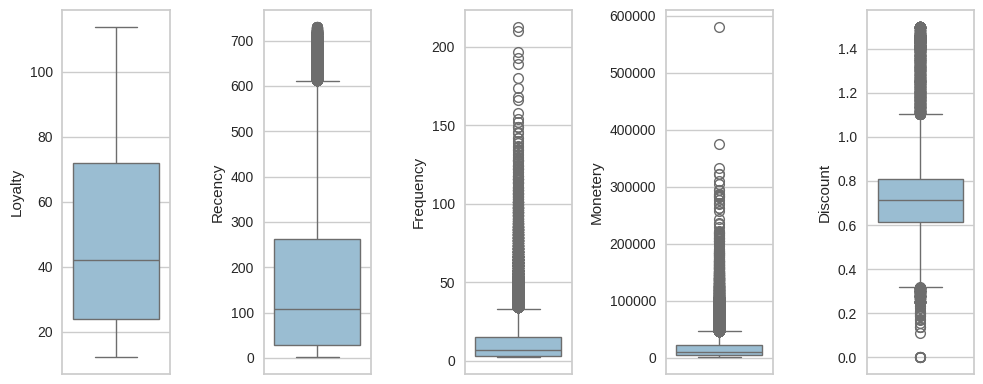

In [63]:
# Melihat ada tidaknya outlier

fitur = ['Loyalty', 'Recency', 'Frequency', 'Monetery', 'Discount']

plt.figure(figsize=(10, 4))
for i in range(0, len(fitur)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_fitur[fitur[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [64]:
# Menghapus outlier

print(f'Jumlah baris sebelum memfilter outlier: {len(df_fitur)}')

fil_ent = np.array([True] * len(df_fitur))
for col in fitur:
    Q1 = df_fitur[col].quantile(0.25)
    Q3 = df_fitur[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_fitur[col] >= low_limit) & (df_fitur[col] <= high_limit)) & fil_ent

df_fitur = df_fitur[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df_fitur))

Jumlah baris sebelum memfilter outlier: 61878
Jumlah baris setelah memfilter outlier 51944


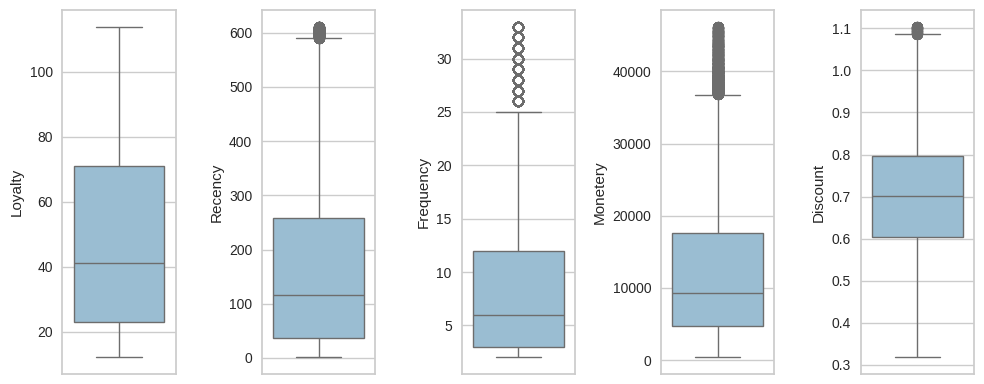

In [65]:
# Melihat sebaran data terbaru setelah outlier dihapus

plt.figure(figsize=(10, 4))
for i in range(0, len(fitur)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_fitur[fitur[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [66]:
df_fitur.describe()

,index,Loyalty,Recency,Frequency,Monetery,Discount
count,51944.000000,51944.000000,51944.000000,51944.000000,51944.000000,51944.000000
mean,33737.735369,47.769367,169.801286,8.799207,12451.817765,0.699245
std,16193.925941,27.862821,161.314171,7.018763,9920.405804,0.144783
min,2188.000000,12.000000,1.000000,2.000000,368.000000,0.317624
25%,19876.750000,23.000000,37.000000,3.000000,4749.000000,0.603592
50%,33517.500000,41.000000,116.000000,6.000000,9288.000000,0.702214
75%,47475.500000,71.000000,258.000000,12.000000,17566.000000,0.796779
max,62975.000000,114.000000,611.000000,33.000000,46205.000000,1.104252


In [67]:
# Menghapus kolom index

df_fitur=df_fitur.drop(columns='index')

In [68]:
# Melakukan standarisasi data

X = df_fitur[fitur].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data = X_std, columns = fitur)

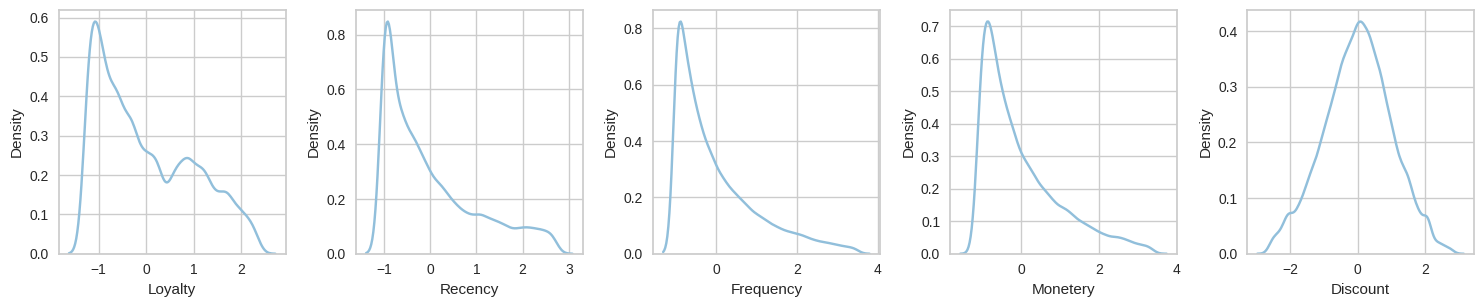

In [69]:
plt.figure(figsize=(15, 15))
for i in range(0, len(fitur)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(df_std[fitur[i]], color='#91bfdb')
    plt.xlabel(fitur[i])
    plt.tight_layout()

In [70]:
df_std.describe()

,Loyalty,Recency,Frequency,Monetery,Discount
count,5.194400e+04,5.194400e+04,5.194400e+04,5.194400e+04,5.194400e+04
mean,-3.501828e-17,7.879112e-17,6.128199e-17,8.754569e-17,-5.734243e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.283779e+00,-1.046423e+00,-9.687280e-01,-1.218089e+00,-2.635837e+00
25%,-8.889841e-01,-8.232542e-01,-8.262514e-01,-7.764694e-01,-6.606702e-01
50%,-2.429557e-01,-3.335219e-01,-3.988215e-01,-3.189233e-01,2.050122e-02
75%,8.337583e-01,5.467564e-01,4.560382e-01,5.155264e-01,6.736619e-01
max,2.377048e+00,2.735054e+00,3.448047e+00,3.402432e+00,2.797361e+00


# Modeling

In [71]:
from sklearn.cluster import KMeans

# Mencari nilai k optimal dengan parameter inertia
inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

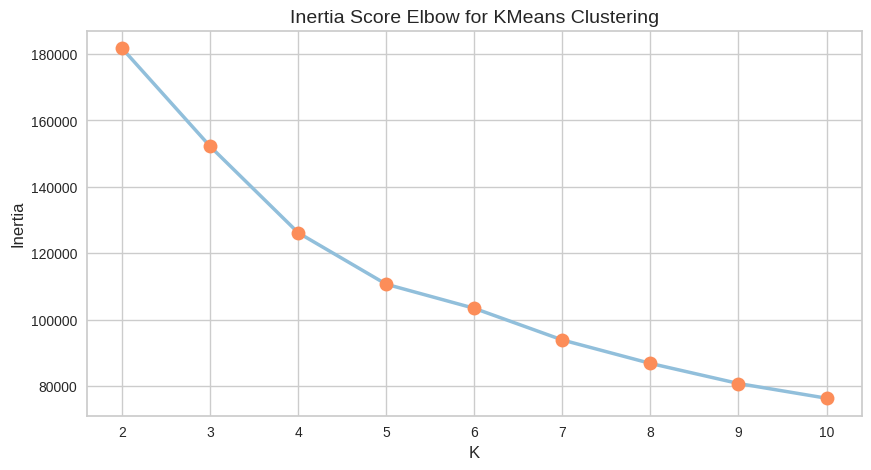

In [72]:
# Visualisasi grafik elbow method

from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

Berdasarkan grafik yang dihasilkan masih belum bisa disimpulkan dimana penurunaan nilai dan patahan yang tajam, sehingga nilai K yang optimal belum bisa diketahui dengan pasti.

In [73]:
# Melakukan perhitungan dengan inersia

(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

,0
0,16.247602
1,17.082591
2,12.277957
3,6.552381
4,9.210010
5,7.510030
6,6.967530
7,5.475210
8,NaN


Setelah k=4, penurunan mulai berkurang drastis (< 10%). Artinya tambahan cluster berikutnya memberi manfaat lebih kecil (diminishing returns).

Titik Elbow kemungkinan ada di sekitar k=3 atau k=4. Karena setelahnya penurunan relatif stabil dan kecil, sehingga menambah cluster tidak terlalu efektif.

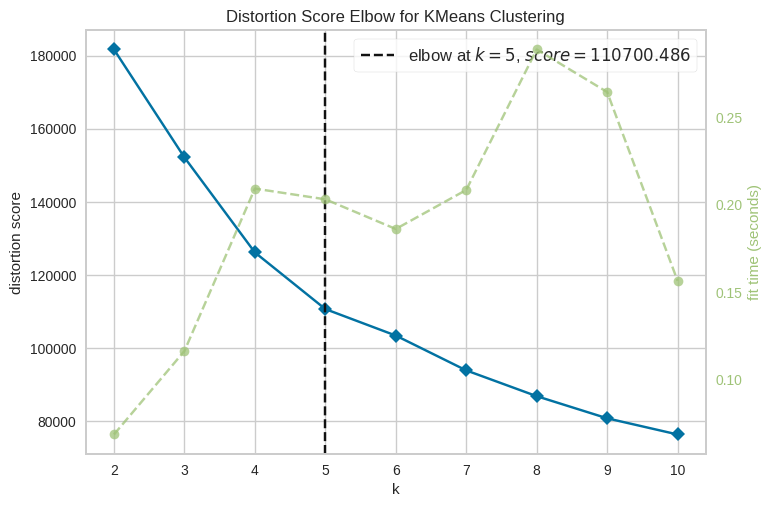

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Visualisasi innertia vs k dengan parameter distortion

from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()

Berdasarkan grafik di atas titik elbow dideteksi pada k=5.

Karena di titik ini terjadi transisi yang cukup jelas yakni penurunan masih signifikan, tapi semakin mengecil.

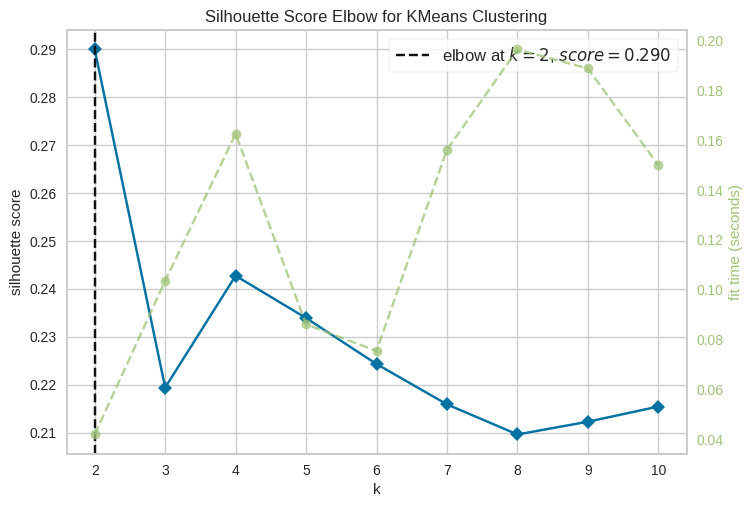

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [75]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()

Semenatara berdasarkan Silhouette Score, nilai tertinggi ada di k=2 (0.29). Artinya pemisahan data paling “bersih” terjadi dalam 2 cluster.

Opsi kedua, pemisahan dapat dilakukan pada 4 cluster karena nilai k = 4 masih lebih tinggi dari yang lain.

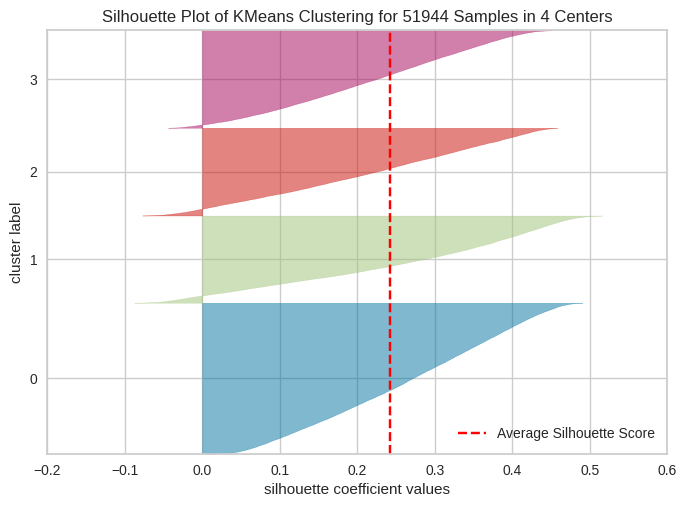

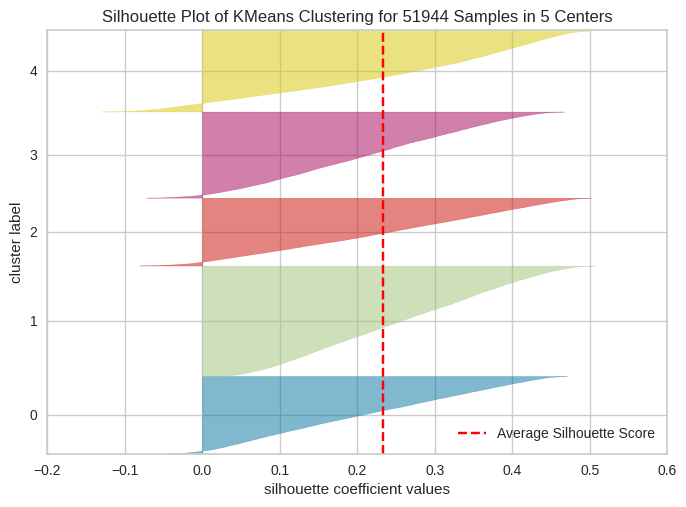

In [76]:
# Visualisasi silhouette plot

from yellowbrick.cluster import SilhouetteVisualizer

for i in [4,5]:
    model = KMeans(i, random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(df_std)
    visualizer.show()

Pada grafik 4 cluster terlihat sebagian besar cluster punya distribusi silhouette yang cukup lebar dengan nilai positif.

Artinya cluster relatif baik terpisah. Hampir tidak ada cluster dengan banyak anggota di bawah 0 (silhouette negatif).

Berdasarkan analisis tersebut, maka dipilih k = 4 untuk n-cluster pada analisis K-Means.

In [84]:
# K-means Clustering

kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(df_std.values)
df_std['cluster'] = kmeans.labels_
df_std.head()

,Loyalty,Recency,Frequency,Monetery,Discount,cluster
0,1.192663,-0.953436,2.735664,3.397090,2.757641,1
1,1.515677,-0.953436,2.878141,3.158992,2.765000,1
2,0.869649,-0.383115,-0.113868,3.341849,2.372179,1
3,-0.135284,-1.009228,2.878141,3.183487,2.486907,1
4,1.084992,1.650204,-0.398822,3.327334,2.213460,1


# PCA

In [85]:
# Melakukan evaluasi PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca

,PC 1,PC 2,cluster
0,3.660410,2.949015,1
1,3.569588,3.119792,1
2,1.893537,1.717267,1
3,3.822298,2.080912,1
4,0.791054,1.536524,1
...,...,...,...
51939,-2.249312,0.014189,2
51940,-2.028026,-0.948724,2
51941,-1.807884,-1.490549,2
51942,-2.002266,1.765446,3


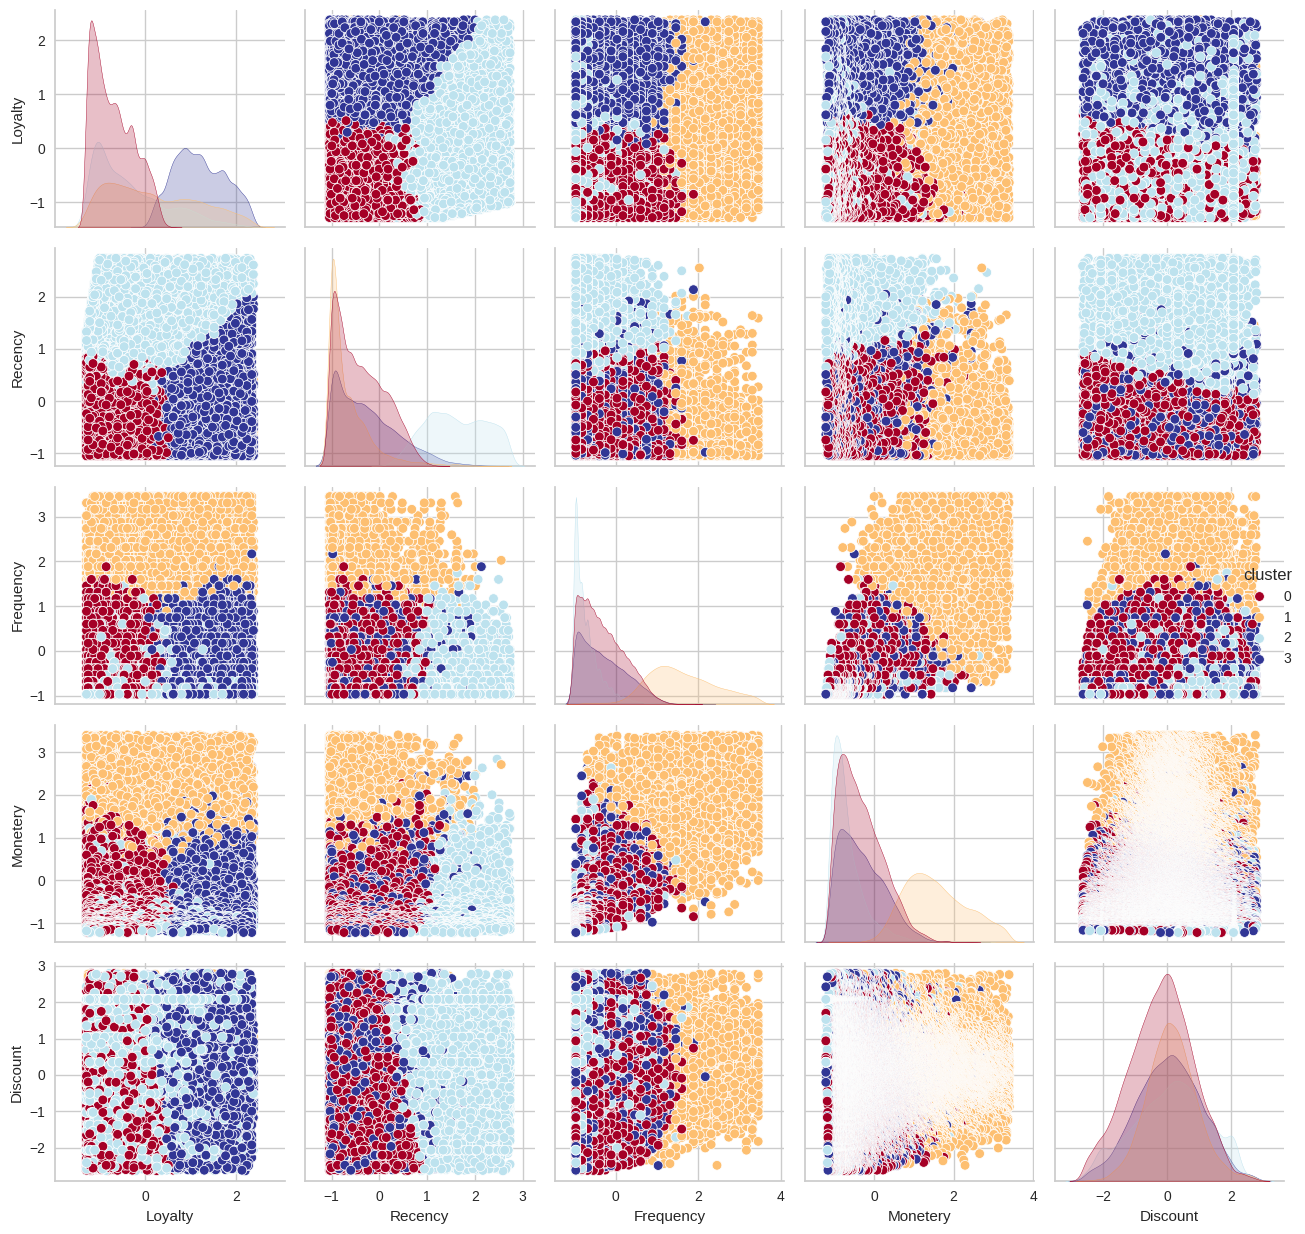

In [79]:
# visualisasi dengan pairplot

sns.pairplot(data=df_std, hue='cluster', diag_kind='kde', palette='RdYlBu')
plt.tight_layout()

Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

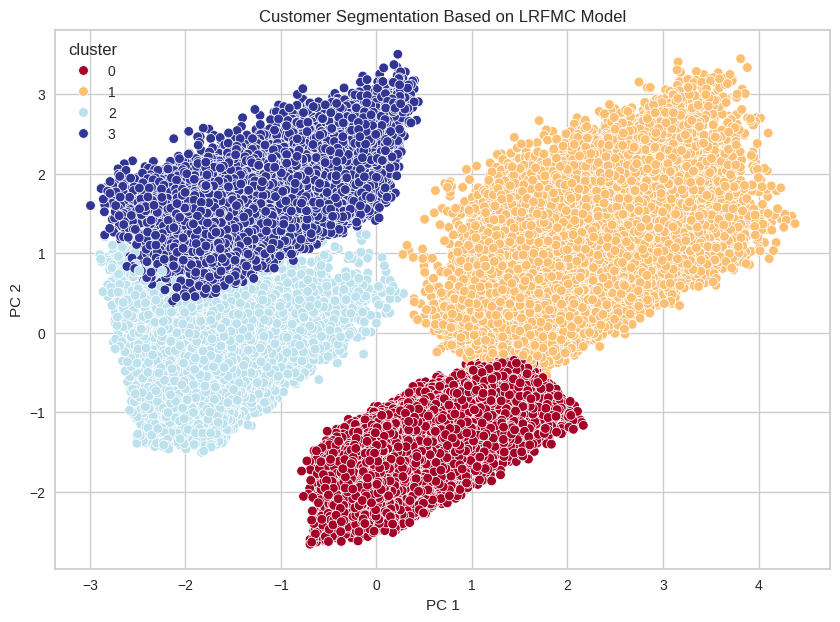

In [80]:
# visualisasi hasil segmentasi

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="cluster", palette='RdYlBu')
plt.title('Customer Segmentation Based on LRFMC Model')

# Interpretasi Cluster

In [81]:
# Menambahkan cluster ke dataframe

df_fitur['cluster'] = kmeans.labels_
display(df_fitur.groupby('cluster').agg(['mean','median','min','max']))

Loyalty                     Recency                   Frequency  \
              mean median min  max        mean median  min  max       mean   
cluster                                                                      
0        28.355145   26.0  12   65  107.661106   94.0    1  373   6.548159   
1        53.149014   49.0  12  114   63.493877   35.0    1  581  19.939703   
2        38.735234   32.0  12  114  429.234584  424.0  189  611   3.918834   
3        81.166012   80.0  46  114  127.529230  108.0    1  560   6.714728   

                            Monetery                        Discount  \
        median min max          mean   median   min    max      mean   
cluster                                                                
0          6.0   2  22   9267.146259   8277.5   368  36696  0.672566   
1         19.0   3  33  27888.873703  26895.0  4600  46205  0.720952   
2          3.0   2  21   5878.427749   4561.5   368  40582  0.715869   
3          6.0   2  24   9494.433972   8525.0   368  38854  0.706183   

                                       
           median       min       max  
cluster                                
0        0.677890  0.317898  1.104079  
1        0.716887  0.339656  1.104105  
2        0.725000  0.317624  1.104252  
3        0.708801  0.317766  1.104221

In [82]:
# Persentase customer setiap cluster

cluster_count = df_fitur['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_std))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

,cluster,count,percentage (%)
0,0,18522,35.66
1,1,10697,20.59
2,2,10768,20.73
3,3,11957,23.02


Text(0, 0.5, 'Value')

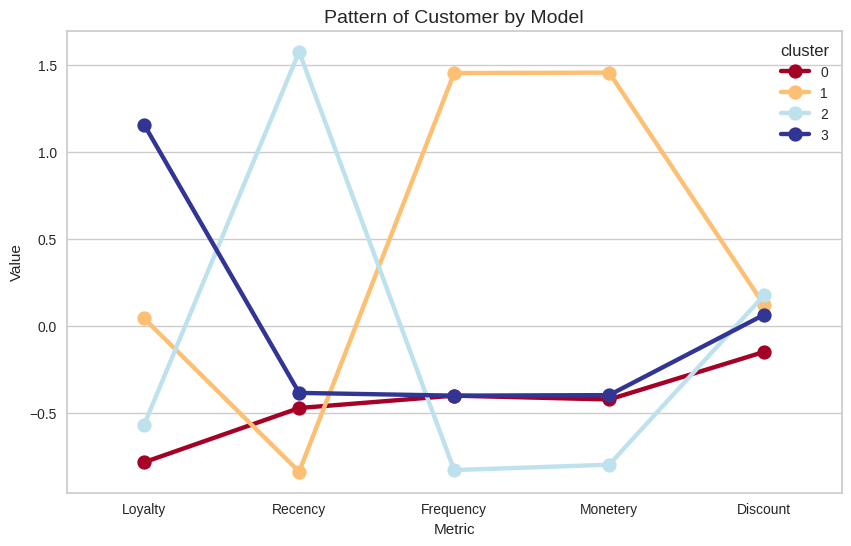

In [83]:
# melihat pola pada setiap cluster

cluster_med=df_std.groupby('cluster').median().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='cluster', value_vars=['Loyalty', 'Recency', 'Frequency','Monetery','Discount'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster', palette='RdYlBu')
plt.title('Pattern of Customer by Model', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

Berdasarkan pola yang ditemukan, customer dapat dibagi menjadi 4 cluster berbeda:

1.  VIP/High Value (Oranye)

Berdasarkan karakteristiknya, cluster ini memiliki Loyalty menengah, Recency rendah, Frequency & Monetary tinggi, serta Discount menengah.

Artinya cluster ini kategori paling sering menggunakan layanan penerbangan dan menjadi kelompok yang paling banyak memberikan uang untuk perusahan.

Kelompok ini juga cenderung tidak memperdulikan diskon yang menandakan pemilihan layanan karena loyalitas.

Rekomendasi Bisnis:
*   Lakukan segmentasi dari kategori penumpang lain, berikan fasilitas khusus berupa lounge access, priority boarding.
*   Berikan layanan customer care khusus atau kemudahan untuk reschedule.
*   Berikan system reward yang dapat ditukarkan dengan tiket pesawat apabila telah mencapai jumlah penerbangan atau jarak penerbangan tertentu.

2.  Potensial (Biru Tua)

Berdasarkan karakteristiknya, cluster ini memiliki Loyalty tinggi, Recency cukup rendah, Frequency-Monetar-Discount menengah.

Artinya cluster ini kategori kedua yang paling sering menggunakan layanan penerbangan dan menjadi kelompok kedua yang paling banyak memberikan uang untuk perusahan.

Rekomendasi Bisnis:

*   Berikan program poin dengan system reward sehingga user akan semakin tertarik dan meningkatkan frekuensi penerbangan.
*   Berikan tawaran dan benefit agar pengguna tidak memilih layanan dasar maskapai.

3.  Discount Oriented (Biru Muda)

Berdasarkan karakteristiknya, cluster ini memiliki Loyalty rendah, Recency tinggi, Frequency-Monetery cukup rendah dan Discount tinggi.

Artinya cluster ini merupakan kelompok pengguna yang hanya memakai layanan ketika diberikan promo atau diskon oleh perusahaan.

Rekomendasi Bisnis:

*  Berikan diskon untuk penerbangan kedua, dst. Sehingga user kembali menggunakan layanan dan meningkatkan frekuensi penerbangan.

4.  New Customer (Merah)

Berdasarkan karakteristiknya, cluster ini memiliki Loyalty rendah, Recency cukup rendah, Frequency-Moneter-Discount menengah.

Artinya cluster ini merupakan kelompok pengguna baru yang bisa menjadi target potensial bagi perusahaan.

* Berikan kelompok user ini promosi atau diskon agar tertarik menggunakan layanan penerbangan.
